# Ejercicio 54

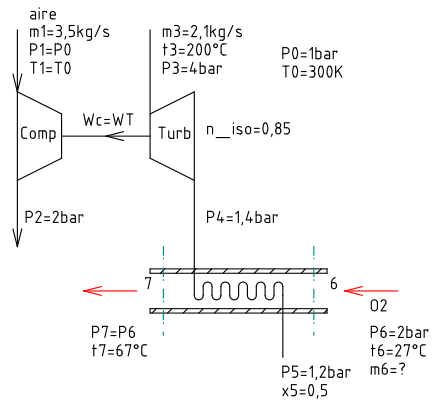



Hallar:

1. $\Delta S_u$
2. $\eta_{ex,proc}$
3. $\eta_{iso,c}$

------

## Solución

### Turbina

__Datos:__

$
\begin{array}{l}
\hline
\dot{m}_3 = 2,1 \mbox{ [kg/s]}, \; P_3 = 4 \mbox{ bar}, \; t_3 = 200^\circ \mbox{C} \\
P_4 = 1,4 \mbox{ bar} \\ 
\eta_{iso} = 0,85 \\
\hline
\end{array}
$

In [2]:
# Datos:
m_3 = 2.1 # [kg/s]
P_3 = 4e5 # [Pa]
T_3 = 200 + 273.15 # [K]
m_4 = m_3
P_4 = 1.4e5 # [Pa]
n_iso = 0.85

Desarrollo teórico:

$\begin{array}{|l|l|c|}
\hline
n^\circ & \mbox{Ecuación} & \mbox{Incógnita} \\
\hline
1) & h_3 = f(P_3,t_3) \quad \mbox{(de tabla)} & h_3 \\
2) & s_3 = f(P_3,t_3) \quad \mbox{(de tabla)} & s_3 \\
3) & s_{4id} = s_3 \quad \mbox{(por isoentrópico)} & s_{4id} \\
4) & s'_4 = f(P_4) \quad \mbox{(líq. saturado)} & s'_4 \\
5) & s''_4 = f(P_4) \quad \mbox{(vap. saturado)} & s''_4 \\
6) & h'_4 = f(P_4) \quad \mbox{(líq. saturado)} & h'_4 \\
7) & h''_4 = f(P_4) \quad \mbox{(vap. saturado)} & h''_4 \\
8) & \displaystyle x_{4id} = \frac{s_{4id} - s'_4}{s''_4 - s'_4} & x_{4id} \\
9) & h_{4id} = x_{4id} (h''_4 - h'_4) + h'_4 & h_{4id} \\
10) & \displaystyle \eta_{iso} = \frac{W_{real}}{W_{ideal}} = \frac{\dot{m}_3 (h_3 - h_4)}{\dot{m}_3 (h_3 - h_{4id})} = \frac{h_3 - h_4}{h_3 - h_{4id}} & \\
    & \mbox{Despejando } h_4: & \\
    & h_4 = \eta_{iso} (h_{4id} - h_3) + h_3 & h_4 \\  
11) & T_4 = f(P_4,h_4) & T_4 \\
12) & s_4 = f(P_4,h_4) & s_4 \\
13) & \dot{W}_T = \dot{m}_3 (h_3 - h_4) & \dot{W}_T \\
\hline
\end{array}$

13 ecuaciones - 13 incógnitas, tiene solución.

In [3]:
import CoolProp.CoolProp as cp  # (importa bilioteca termodinámica)

In [4]:
h_3 = cp.PropsSI('H','P',P_3,'T',T_3,'Water') #  (1)
s_3 = cp.PropsSI('S','P',P_3,'T',T_3,'Water') #  (2)
s_4id = s_3                                   #  (3)
s_f4 = cp.PropsSI('S','P',P_4,'Q',0,'Water')  #  (4)
s_g4 = cp.PropsSI('S','P',P_4,'Q',1,'Water')  #  (5)
h_f4 = cp.PropsSI('H','P',P_4,'Q',0,'Water')  #  (6)
h_g4 = cp.PropsSI('H','P',P_4,'Q',1,'Water')  #  (7)
x_4id = (s_4id - s_f4)/(s_g4 - s_f4)          #  (8)
h_4id = x_4id*(h_g4 - h_f4) + h_f4            #  (9)
h_4 = n_iso*(h_4id - h_3) + h_3               # (10)
T_4 = cp.PropsSI('T','P',P_4,'H',h_4,'Water') # (11)
s_4 = cp.PropsSI('S','P',P_4,'H',h_4,'Water') # (12)
W_T = m_3*(h_3 - h_4)                         # (13)

In [5]:
#@title Resultados:
print('Turbina:')
print('h_3 = %.2f [kJ/kg]'%(h_3/1000))
print('s_3 = %.5f [kJ/(kg·K)]'%(s_3/1000))
print('s_4id = %.5f [kJ/(kg·K)]'%(s_4id/1000))
print('s_f4 = %.5f [kJ/(kg·K)]'%(s_f4/1000))
print('s_g4 = %.5f [kJ/(kg·K)]'%(s_g4/1000))
print('h_f4 = %.2f [kJ/kg]'%(h_f4/1000))
print('h_g4 = %.2f [kJ/kg]'%(h_g4/1000))
print('x_4id = %.4f'%x_4id)
print('h_4id = %.2f [kJ/kg]'%(h_4id/1000))
print('h_4 = %.2f [kJ/kg]'%(h_4/1000))
print('T_4 = %.2f [K]'%T_4)
print('s_4 = %.5f [kJ/(kg·K)]'%(s_4/1000))
print('W_T = %.2f [kJ/s]'%(W_T/1000))

Turbina:
h_3 = 2860.93 [kJ/kg]
s_3 = 7.17230 [kJ/(kg·K)]
s_4id = 7.17230 [kJ/(kg·K)]
s_f4 = 1.41100 [kJ/(kg·K)]
s_g4 = 7.24606 [kJ/(kg·K)]
h_f4 = 458.42 [kJ/kg]
h_g4 = 2689.98 [kJ/kg]
x_4id = 0.9874
h_4id = 2661.78 [kJ/kg]
h_4 = 2691.65 [kJ/kg]
T_4 = 383.23 [K]
s_4 = 7.25041 [kJ/(kg·K)]
W_T = 355.48 [kJ/s]


### Compresor

__Datos:__

$\begin{array}{l}
\hline
W_c = W_T \\
P_0 = 1 \mbox{ bar}, \; T_0 = 300^\circ \mbox{C} \\
m_1 = 3,5 \mbox{ kg/s}, \; P_1=P_0, \; T_1 = T_0 \\
P_2 = 2 \mbox{ bar} \\
c_{p,aire} = 1,0047 \mbox{ [kJ/(kg·K)]} \\
R_{aire} = 0,287 \mbox{ [kJ/(kg·K)]} \\
\hline
\end{array}$

In [6]:
# Datos:
W_c = -W_T
P_0 = 1e5 # [Pa]
T_0 = 300 # [K]
m_1 = 3.5 # [kg/s]
P_1 = P_0
T_1 = T_0
P_2 = 2e5 # [Pa]
cp_aire = 1.0047e3 # [J/(kg·K)]
R_aire = 0.287e3 # [J/(kg·K)]

In [7]:
import numpy as np

$\begin{array}{|l|l|c|}
\hline
n^\circ & \mbox{Ecuación} & \mbox{Incógnita} \\
\hline
1) & |\dot{W}_c| = |\dot{W}_T| = \dot{m}_3 (h_3 - h_4) & \dot{W}_c \\
2) &  \Delta H_{12} = - \dot{W}_c & \Delta H_{12} \\
3) & \Delta H_{12} = \dot{m} c_{p,aire} \Delta T_{12} \\
 & \mbox{Despejando } \Delta T_{12}: \\
 & \displaystyle \Delta T_{12} = \frac{\Delta H_{12}}{\dot{m}_1  c_{p,aire}} & \Delta T_{12} \\
4) & T_2 = T_1 + \Delta T_{12} & T_2 \\
5) & \displaystyle \Delta S_{12} = \dot{m}_1 \left( c_{p,aire} \ln \frac{T_2}{T_1} - R_{aire} \ln \frac{P_2}{P_1} \right) & \Delta S_{12} \\
\hline
\end{array}$

In [8]:
DH_12 = -W_c                                                  # (2)
DT_12 = DH_12/(m_1*cp_aire)                                   # (3)
T_2 = T_1 + DT_12                                             # (4)
DS_12 = m_1*(cp_aire*np.log(T_2/T_1) - R_aire*np.log(P_2/P_1))# (5)

In [9]:
#@title Resultados:
print('Compresor:')
print('W_c = %.2f [kJ/s]'%(W_c/1000))
print('DT_12 = %.2f [K]'%DT_12)
print('T_2 = %.2f [K]'%T_2)
print('DS_12 = %.5f [kJ/K]'%(DS_12/1000))

Compresor:
W_c = -355.48 [kJ/s]
DT_12 = 101.09 [K]
T_2 = 401.09 [K]
DS_12 = 0.32494 [kJ/K]


### Intercambiador de calor

__Datos:__

$\begin{array}{l}
\hline
P_4 \mbox{ y del ítem anterior averiguamos, } T_4,h_4,s_4 \\
P_5,x_5 \\
P_6,t_6 \\
P_7,t_7 \\
c_{p,O_2} = 0,9185  \mbox{ [kJ/(kg·K)]} \\
\hline
\end{array}$

In [10]:
# Datos:
P_5 = 1.2e5 # [Pa]
x_5 = 0.5
P_6 = 2e5 # [Pa]
P_7 = P_6
T_6 = 27 + 273.15 # [K]
T_7 = 67 + 273.15 # [K]
cp_O2 = 0.9185e3 # [J/(kg·K)]

$\begin{array}{|l|c|}
\hline
\mbox{Ecuación} & \mbox{Incógnita} \\
\hline
h'_5 = f(P_5) \quad \mbox{ (de tabla)} & h'_5 \\
h''_5 = f(P_5) \quad \mbox{ (de tabla)} & h''_5 \\
h_5 = x_5(h''_5 - h'_5) + h'_5 & h_5 \\
s'_5 = f(P_5) \quad \mbox{ (de tabla)} & s'_5 \\
s''_5 = f(P_5) \quad \mbox{ (de tabla)} & s''_5 \\
s_5 = x_5(s''_5 - s'_5) + s'_5 & s_5\\
\hline
\end{array}$

In [11]:
h_f5 = cp.PropsSI('H','P',P_5,'Q',0,'Water')
h_g5 = cp.PropsSI('H','P',P_5,'Q',1,'Water')

h_5 = x_5*(h_g5 - h_f5) + h_f5

s_f5 = cp.PropsSI('S','P',P_5,'Q',0,'Water')
s_g5 = cp.PropsSI('S','P',P_5,'Q',1,'Water')

s_5 = x_5*(s_g5 - s_f5) + s_f5

In [12]:
print('h_5 = %.2f [kJ/kg]'%(h_5/1000))
print('s_5 = %.5f [kJ/(kg·K)]'%(s_5/1000))

h_5 = 1561.21 [kJ/kg]
s_5 = 4.32930 [kJ/(kg·K)]


__Variación de entropían en 6-7__

$$ \Delta S_{67} = \dot{m}_6 \left( c_{p,O_2} \ln \frac{T_7}{T_6} - R_{O_2} \ln \frac{P_7}{P_6} \right) $$

Tenemos que $P_6 = P_7$, entonces se simplifica:

$$ \Delta S_{67} = \dot{m}_6 \left( c_{p,O_2} \ln \frac{T_7}{T_6} \right) $$

Averiguamos $\dot{m}_6$, sabiendo que

$$ |\Delta H_{45}| = \dot{m}_6 |\Delta h_{67}| $$

Entonces:
$$ \dot{m}_6 = \left| \frac{\Delta H_{45}}{\Delta h_{67}} \right| = \left| \frac{\dot{m}_4 (h_5 - h_4)}{c_{p,O_2} (T_7 - T_6)} \right| $$

Luego, calculamos la variación de entropía entra el punto 3 y 5

$$ \Delta S_{35} = \dot{m}_3 (s_5 - s_3) $$

In [13]:
DH_45 = m_4*(h_5 - h_4)
Dh_67 = cp_O2*(T_7 - T_6)

m_6 = abs( DH_45/Dh_67 )
DS_67 = m_6*(cp_O2*np.log(T_7/T_6))
DS_35 = m_3*(s_5 - s_3)

In [14]:
#@title Resultados:
print('m_6 = %.2f [kg/s]'%m_6)
print('DS_12 = %.5f [kJ/K]'%(DS_12/1000))
print('DS_35 = %.5f [kJ/K]'%(DS_35/1000))
print('DS_67 = %.5f [kJ/K]'%(DS_67/1000))

m_6 = 64.61 [kg/s]
DS_12 = 0.32494 [kJ/K]
DS_35 = -5.97030 [kJ/K]
DS_67 = 7.42473 [kJ/K]


### Variación de entropía del Universo
$$ \Delta S_u = \Delta S_{12} + \Delta S_{35} + \Delta S_{67} $$

In [15]:
DS_u = DS_12 + DS_35 + DS_67

In [16]:
#@title Resultado:
print('DS_u  = %.5f [kJ/K]'%(DS_u/1000))

DS_u  = 1.77936 [kJ/K]


### Variación de exergías

$\begin{array}{l}
\Delta Ex_{12} = \Delta H_{12} - T_0 \Delta S_{12} \\
\Delta Ex_{34} = \Delta H_{34} - T_0 \Delta S_{34} \\
\Delta Ex_{45} = \Delta H_{45} - T_0 \Delta S_{45} \\
\Delta Ex_{67} = \Delta H_{67} - T_0 \Delta S_{67} \\
\end{array}$

In [17]:
DH_34 = m_3*(h_4 - h_3)
DH_67 = m_6*Dh_67
DS_34 = m_3*(s_4 - s_3)
DS_45 = m_4*(s_5 - s_4)

In [18]:
DEx_12 = DH_12 - T_0*DS_12
DEx_34 = DH_34 - T_0*DS_34
DEx_45 = DH_45 - T_0*DS_45
DEx_67 = DH_67 - T_0*DS_67

In [19]:
#@title Resultados:
print('Variación de entalpías:')
print('DH_12 = %.2f [kJ]'%(DH_12/1000))
print('DH_34 = %.2f [kJ]'%(DH_34/1000))
print('DH_45 = %.2f [kJ]'%(DH_45/1000))
print('DH_67 = %.2f [kJ]'%(DH_67/1000))
print('Variación de entropías:')
print('DS_12 = %.5f [kJ/K]'%(DS_12/1000))
print('DS_34 = %.5f [kJ/K]'%(DS_34/1000))
print('DS_45 = %.5f [kJ/K]'%(DS_45/1000))
print('DS_67 = %.5f [kJ/K]'%(DS_67/1000))
print('Variación de exergías:')
print('DEx_12 = %.2f [kJ]'%(DEx_12/1000))
print('DEx_34 = %.2f [kJ]'%(DEx_34/1000))
print('DEx_45 = %.2f [kJ]'%(DEx_45/1000))
print('DEx_67 = %.2f [kJ]'%(DEx_67/1000))

Variación de entalpías:
DH_12 = 355.48 [kJ]
DH_34 = -355.48 [kJ]
DH_45 = -2373.93 [kJ]
DH_67 = 2373.93 [kJ]
Variación de entropías:
DS_12 = 0.32494 [kJ/K]
DS_34 = 0.16402 [kJ/K]
DS_45 = -6.13432 [kJ/K]
DS_67 = 7.42473 [kJ/K]
Variación de exergías:
DEx_12 = 258.00 [kJ]
DEx_34 = -404.69 [kJ]
DEx_45 = -533.63 [kJ]
DEx_67 = 146.51 [kJ]


### Rendimiento exergético del proceso

$$ \eta_{ex,proc} = \frac{\Delta Ex_{12} + \Delta Ex_{67}}{|\Delta Ex_{34} + \Delta Ex_{45}|} $$

In [20]:
n_exproc = (DEx_12 + DEx_67)/abs(DEx_34 + DEx_45)

In [21]:
#@title Resultado:
print('n_exproc = %.4f'%n_exproc)

n_exproc = 0.4311


### Rendimiento isoentrópico del compresor

$$ \eta_{iso,c} = \frac{W_{ideal}}{W_{real}} = \frac{W_c}{W_c - T_0 \Delta S_{12}} $$

In [22]:
n_isoc = W_c/(W_c - T_0*DS_12)

In [23]:
#@title Resultado
print('n_isoc = %.4f'%n_isoc)

n_isoc = 0.7848
